# 01. 데이터 살펴보기

In [1]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = pymysql.connect(host='localhost', user='ssafy', password='ssafy',
                       db='docong_test_v1', charset='utf8')
cursor = conn.cursor()

# 데이터

def get_data(table):
    cursor.execute(f'SELECT * FROM {table}')
    return cursor.fetchall()

# 컬럼

def get_columns(table):
    cursor.execute(f'SHOW columns FROM {table}')
    columns = cursor.fetchall()
    
    table_columns = []
    for column in columns:
        table_columns.append(column[0])
    
    table_columns[0] = f'{table}_seq'
    return table_columns

## Table
| user, team, team_user, todo, user_todo, pomodoro

- 유저의 작업 효율
: user, pomodoro / user, user_todo, todo
- 작업의 정량적 난이도(?)
: todo, pomodoro

In [3]:
# user

user_data = get_data('user')
user_columns = get_columns('user')
user_df = pd.DataFrame(user_data, columns = user_columns)

user_df['activate'] = user_df['activate'].map({b'\x01':1, b'\x00':0})
user_df.drop(['email', 'name', 'oauth_type', 'password', 'refresh_token'], axis=1, inplace=True)
user_df.head()

,user_seq,activate,birth,gender,job,mbti,position
0,27,1,2022-03-23,MALE,IT/인터넷,ESFJ,0
1,28,1,1998-01-24,FEMALE,IT/인터넷,ISFP,0
2,29,1,1998-01-24,FEMALE,IT/인터넷,ISFP,0
3,30,1,1995-07-27T15:00:00.000Z,MALE,IT/인터넷,ENTJ,0
4,31,1,None,None,None,None,None


In [4]:
# 데이터 정보
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_seq  11 non-null     int64 
 1   activate  11 non-null     int64 
 2   birth     10 non-null     object
 3   gender    10 non-null     object
 4   job       10 non-null     object
 5   mbti      6 non-null      object
 6   position  10 non-null     object
dtypes: int64(2), object(5)
memory usage: 744.0+ bytes


In [5]:
# todo

todo_data = get_data('todo')
todo_columns = get_columns('todo')
todo_df = pd.DataFrame(todo_data, columns = todo_columns)

todo_df.drop(['content', 'title'], axis=1, inplace=True)
todo_df.head()

,todo_seq,created_date,modified_date,predicted_pomo,real_pomo,status,work_importance,work_proficiency,work_type,team_seq
0,17,2022-03-23 05:21:01,2022-03-24 15:21:18,8,8,2,3,1,2,None
1,19,2022-03-23 05:21:55,2022-03-24 05:01:30,4,1,2,3,2,13,None
2,23,2022-03-23 05:29:18,2022-03-24 00:32:12,2,2,2,3,0,4,None
3,25,2022-03-23 05:29:48,2022-03-25 02:05:03,4,5,1,3,0,6,None
4,27,2022-03-23 05:31:51,2022-03-24 00:59:39,3,4,2,3,1,2,None


In [6]:
todo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   todo_seq          23 non-null     int64         
 1   created_date      23 non-null     datetime64[ns]
 2   modified_date     23 non-null     datetime64[ns]
 3   predicted_pomo    23 non-null     int64         
 4   real_pomo         23 non-null     int64         
 5   status            23 non-null     int64         
 6   work_importance   23 non-null     int64         
 7   work_proficiency  23 non-null     int64         
 8   work_type         23 non-null     int64         
 9   team_seq          0 non-null      object        
dtypes: datetime64[ns](2), int64(7), object(1)
memory usage: 1.9+ KB


In [7]:
# user_todo

user_todo_data = get_data('user_todo')
user_todo_columns = get_columns('user_todo')
user_todo_df = pd.DataFrame(user_todo_data, columns = user_todo_columns)

user_todo_df.drop(['user_todo_seq', 'created_date', 'modified_date'], axis=1, inplace=True)
user_todo_df.head()

,todo_seq,user_seq
0,17,30
1,19,27
2,23,32
3,25,28
4,27,33


In [8]:
# pomodoro

pomodoro_data = get_data('pomodoro')
pomodoro_columns = get_columns('pomodoro')
pomodoro_df = pd.DataFrame(pomodoro_data, columns = pomodoro_columns)

pomodoro_df.drop(['created_date', 'modified_date'], axis=1, inplace=True)
pomodoro_df.head()

,pomodoro_seq,end_time,noise,other_time,start_time,time_status,todo_seq,user_seq
0,29,2022-03-23 14:45:23,COMMON,0,2022-03-23 15:00:23,SHORT,19.0,27
1,69,2022-03-23 15:12:23,COMMON,0,2022-03-23 15:27:23,SHORT,27.0,33
2,70,2022-03-23 15:22:55,COMMON,0,2022-03-23 15:37:55,SHORT,43.0,28
3,112,2022-03-23 15:40:08,COMMON,0,2022-03-23 15:55:08,SHORT,30.0,31
4,113,2022-03-23 15:42:00,COMMON,0,2022-03-23 15:57:00,SHORT,27.0,33


In [9]:
pomodoro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   pomodoro_seq  54 non-null     int64         
 1   end_time      54 non-null     datetime64[ns]
 2   noise         54 non-null     object        
 3   other_time    54 non-null     int64         
 4   start_time    54 non-null     datetime64[ns]
 5   time_status   54 non-null     object        
 6   todo_seq      53 non-null     float64       
 7   user_seq      54 non-null     int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 3.5+ KB


### user-pomodoro
| 유저에 따른 뽀모도로 확인

In [10]:
users = list(user_df['user_seq'])
users

[27, 28, 29, 30, 31, 32, 33, 34, 132, 243, 730]

In [11]:
user = users[6]
user_pomo = pomodoro_df[pomodoro_df['user_seq'] == user]
user_pomo.head()

,pomodoro_seq,end_time,noise,other_time,start_time,time_status,todo_seq,user_seq
1,69,2022-03-23 15:12:23,COMMON,0,2022-03-23 15:27:23,SHORT,27.0,33
4,113,2022-03-23 15:42:00,COMMON,0,2022-03-23 15:57:00,SHORT,27.0,33
7,116,2022-03-23 16:11:15,COMMON,0,2022-03-23 16:26:15,SHORT,27.0,33
11,120,2022-03-23 16:43:02,COMMON,0,2022-03-23 16:58:02,SHORT,27.0,33
18,162,2022-03-24 11:21:16,COMMON,0,2022-03-24 11:36:16,SHORT,160.0,33


In [12]:
user_pomo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1 to 52
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   pomodoro_seq  15 non-null     int64         
 1   end_time      15 non-null     datetime64[ns]
 2   noise         15 non-null     object        
 3   other_time    15 non-null     int64         
 4   start_time    15 non-null     datetime64[ns]
 5   time_status   15 non-null     object        
 6   todo_seq      15 non-null     float64       
 7   user_seq      15 non-null     int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 1.1+ KB


In [13]:
user_pomo.describe(include='O')

,noise,time_status
count,15,15
unique,1,3
top,COMMON,SHORT
freq,15,8


### user-todo
| 유저에 따른 todo 확인

In [14]:
users_todo = pd.merge(todo_df, user_todo_df, how='left')
users_todo.head()

,todo_seq,created_date,modified_date,predicted_pomo,real_pomo,status,work_importance,work_proficiency,work_type,team_seq,user_seq
0,17,2022-03-23 05:21:01,2022-03-24 15:21:18,8,8,2,3,1,2,None,30
1,19,2022-03-23 05:21:55,2022-03-24 05:01:30,4,1,2,3,2,13,None,27
2,23,2022-03-23 05:29:18,2022-03-24 00:32:12,2,2,2,3,0,4,None,32
3,25,2022-03-23 05:29:48,2022-03-25 02:05:03,4,5,1,3,0,6,None,28
4,27,2022-03-23 05:31:51,2022-03-24 00:59:39,3,4,2,3,1,2,None,33


In [15]:
user = users[6]
user_todo = users_todo[users_todo['user_seq'] == user]
user_todo.head()

,todo_seq,created_date,modified_date,predicted_pomo,real_pomo,status,work_importance,work_proficiency,work_type,team_seq,user_seq
4,27,2022-03-23 05:31:51,2022-03-24 00:59:39,3,4,2,3,1,2,None,33
12,152,2022-03-24 01:00:25,2022-03-25 05:11:50,5,3,2,3,0,4,None,33
14,160,2022-03-24 02:00:31,2022-03-24 04:59:40,5,3,2,2,3,4,None,33
15,236,2022-03-24 05:00:10,2022-03-24 05:20:08,1,1,2,1,3,9,None,33
17,242,2022-03-24 05:20:53,2022-03-25 01:38:14,2,3,2,3,1,5,None,33


In [16]:
user_todo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 4 to 22
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   todo_seq          6 non-null      int64         
 1   created_date      6 non-null      datetime64[ns]
 2   modified_date     6 non-null      datetime64[ns]
 3   predicted_pomo    6 non-null      int64         
 4   real_pomo         6 non-null      int64         
 5   status            6 non-null      int64         
 6   work_importance   6 non-null      int64         
 7   work_proficiency  6 non-null      int64         
 8   work_type         6 non-null      int64         
 9   team_seq          0 non-null      object        
 10  user_seq          6 non-null      int64         
dtypes: datetime64[ns](2), int64(8), object(1)
memory usage: 576.0+ bytes


In [17]:
user_todo.describe()

,todo_seq,predicted_pomo,real_pomo,status,work_importance,work_proficiency,work_type,user_seq
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0
mean,259.166667,3.500000,2.500000,1.833333,2.666667,1.333333,4.666667,33.0
std,247.116504,1.760682,1.224745,0.408248,1.032796,1.366260,2.338090,0.0
min,27.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,33.0
25%,154.000000,2.250000,1.500000,2.000000,2.250000,0.250000,4.000000,33.0
50%,198.000000,4.000000,3.000000,2.000000,3.000000,1.000000,4.000000,33.0
75%,240.500000,5.000000,3.000000,2.000000,3.000000,2.500000,4.750000,33.0
max,738.000000,5.000000,4.000000,2.000000,4.000000,3.000000,9.000000,33.0


### todo-pomodoro
| todo에 따른 뽀모도로 확인

In [18]:
# todo가 없는 pomo제거
nan_todos = list(pomodoro_df['todo_seq'][pomodoro_df['todo_seq'].isnull()].index)
all_todo_pomo = pomodoro_df.drop(nan_todos)

# todo_seq를 float -> int 변경
all_todo_pomo = all_todo_pomo.astype({'todo_seq':'int'})
all_todo_pomo

,pomodoro_seq,end_time,noise,other_time,start_time,time_status,todo_seq,user_seq
0,29,2022-03-23 14:45:23,COMMON,0,2022-03-23 15:00:23,SHORT,19,27
1,69,2022-03-23 15:12:23,COMMON,0,2022-03-23 15:27:23,SHORT,27,33
2,70,2022-03-23 15:22:55,COMMON,0,2022-03-23 15:37:55,SHORT,43,28
3,112,2022-03-23 15:40:08,COMMON,0,2022-03-23 15:55:08,SHORT,30,31
4,113,2022-03-23 15:42:00,COMMON,0,2022-03-23 15:57:00,SHORT,27,33
5,114,2022-03-23 15:45:50,COMMON,0,2022-03-23 16:00:50,SHORT,25,28
6,115,2022-03-23 16:07:58,COMMON,0,2022-03-23 16:22:58,SHORT,30,31
7,116,2022-03-23 16:11:15,COMMON,0,2022-03-23 16:26:15,SHORT,27,33
8,117,2022-03-23 15:38:00,COMMON,0,2022-03-23 16:28:00,LONG,23,32
9,118,2022-03-23 15:39:31,COMMON,0,2022-03-23 16:29:31,LONG,48,30


In [19]:
todos = list(todo_df['todo_seq'])
todos

[17,
 19,
 23,
 25,
 27,
 30,
 32,
 34,
 43,
 48,
 147,
 150,
 152,
 154,
 160,
 236,
 238,
 242,
 442,
 618,
 727,
 730,
 738]

In [20]:
todo = todos[0]
todo_pomo = all_todo_pomo[all_todo_pomo['todo_seq'] == todo]
todo_pomo

,pomodoro_seq,end_time,noise,other_time,start_time,time_status,todo_seq,user_seq
16,144,2022-03-23 23:50:40,COMMON,0,2022-03-24 00:15:40,BASIC,17,30
19,163,2022-03-24 10:49:56,COMMON,0,2022-03-24 11:39:56,LONG,17,30
21,234,2022-03-24 13:23:00,COMMON,0,2022-03-24 13:48:00,BASIC,17,30
28,305,2022-03-24 14:32:54,COMMON,0,2022-03-24 14:57:54,BASIC,17,30
31,616,2022-03-24 16:18:36,COMMON,0,2022-03-24 17:08:36,LONG,17,30
34,621,2022-03-24 17:35:58,COMMON,0,2022-03-24 18:25:58,LONG,17,30
36,625,2022-03-24 20:57:04,COMMON,0,2022-03-24 21:47:04,LONG,17,30
37,683,2022-03-24 22:19:41,COMMON,0,2022-03-24 23:09:41,LONG,17,30


In [21]:
todo_pomo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 16 to 37
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   pomodoro_seq  8 non-null      int64         
 1   end_time      8 non-null      datetime64[ns]
 2   noise         8 non-null      object        
 3   other_time    8 non-null      int64         
 4   start_time    8 non-null      datetime64[ns]
 5   time_status   8 non-null      object        
 6   todo_seq      8 non-null      int64         
 7   user_seq      8 non-null      int64         
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 576.0+ bytes


In [22]:
todo_pomo.describe()

,pomodoro_seq,other_time,todo_seq,user_seq
count,8.000000,8.0,8.0,8.0
mean,423.875000,0.0,17.0,30.0
std,232.973596,0.0,0.0,0.0
min,144.000000,0.0,17.0,30.0
25%,216.250000,0.0,17.0,30.0
50%,460.500000,0.0,17.0,30.0
75%,622.000000,0.0,17.0,30.0
max,683.000000,0.0,17.0,30.0


In [23]:
todo_pomo.describe(include='O')

,noise,time_status
count,8,8
unique,1,2
top,COMMON,LONG
freq,8,5


## 시각화

### histogram

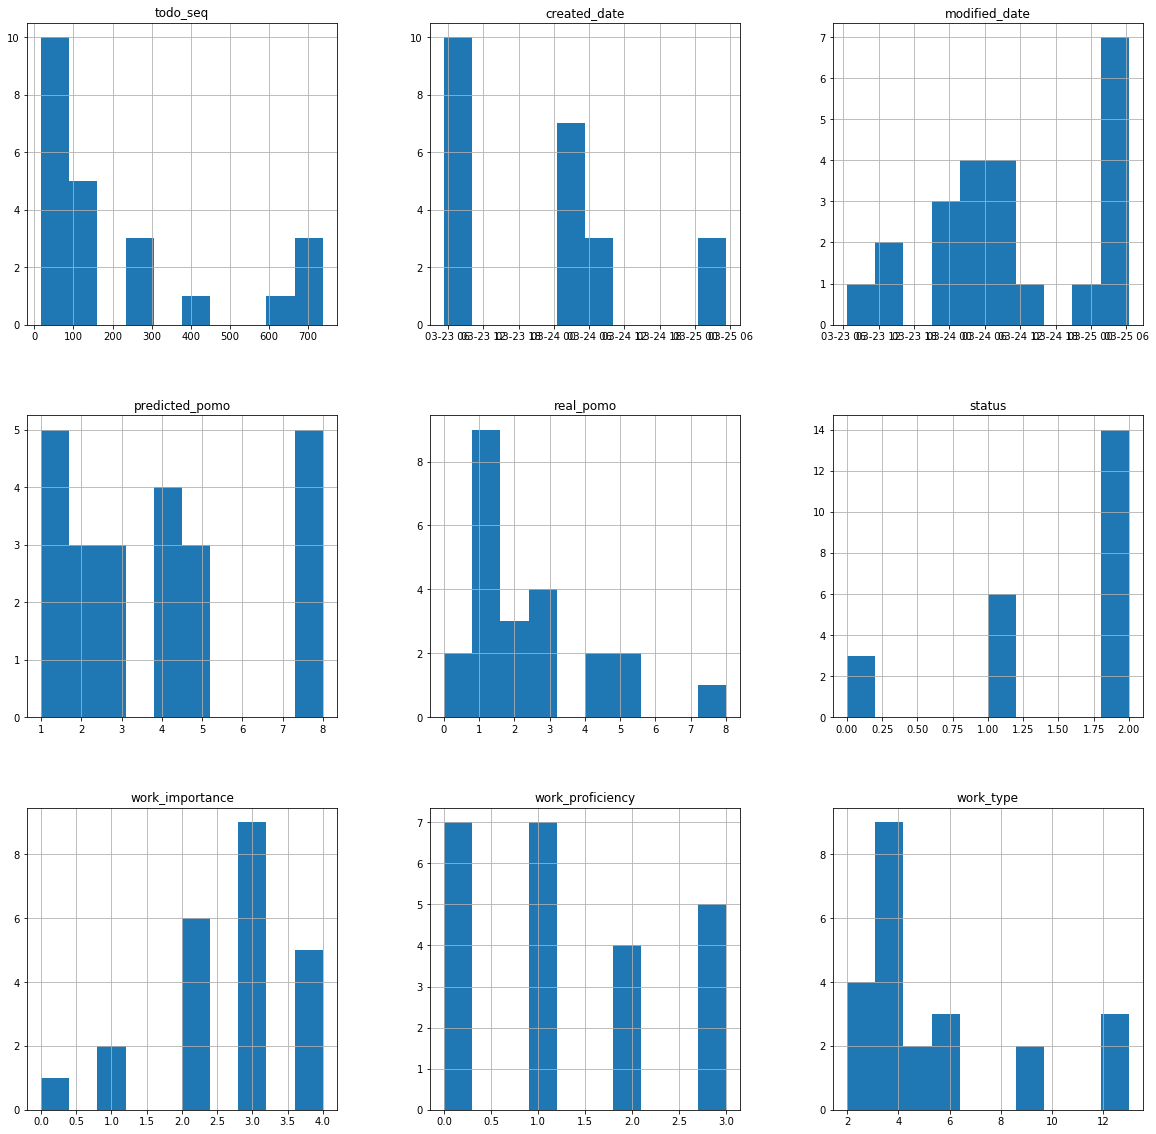

In [29]:
todo_df.hist(bins=10, figsize=(20, 20,)) # bins : 구간 개수
plt.show()

### barplot
https://hleecaster.com/python-seaborn-barplot/

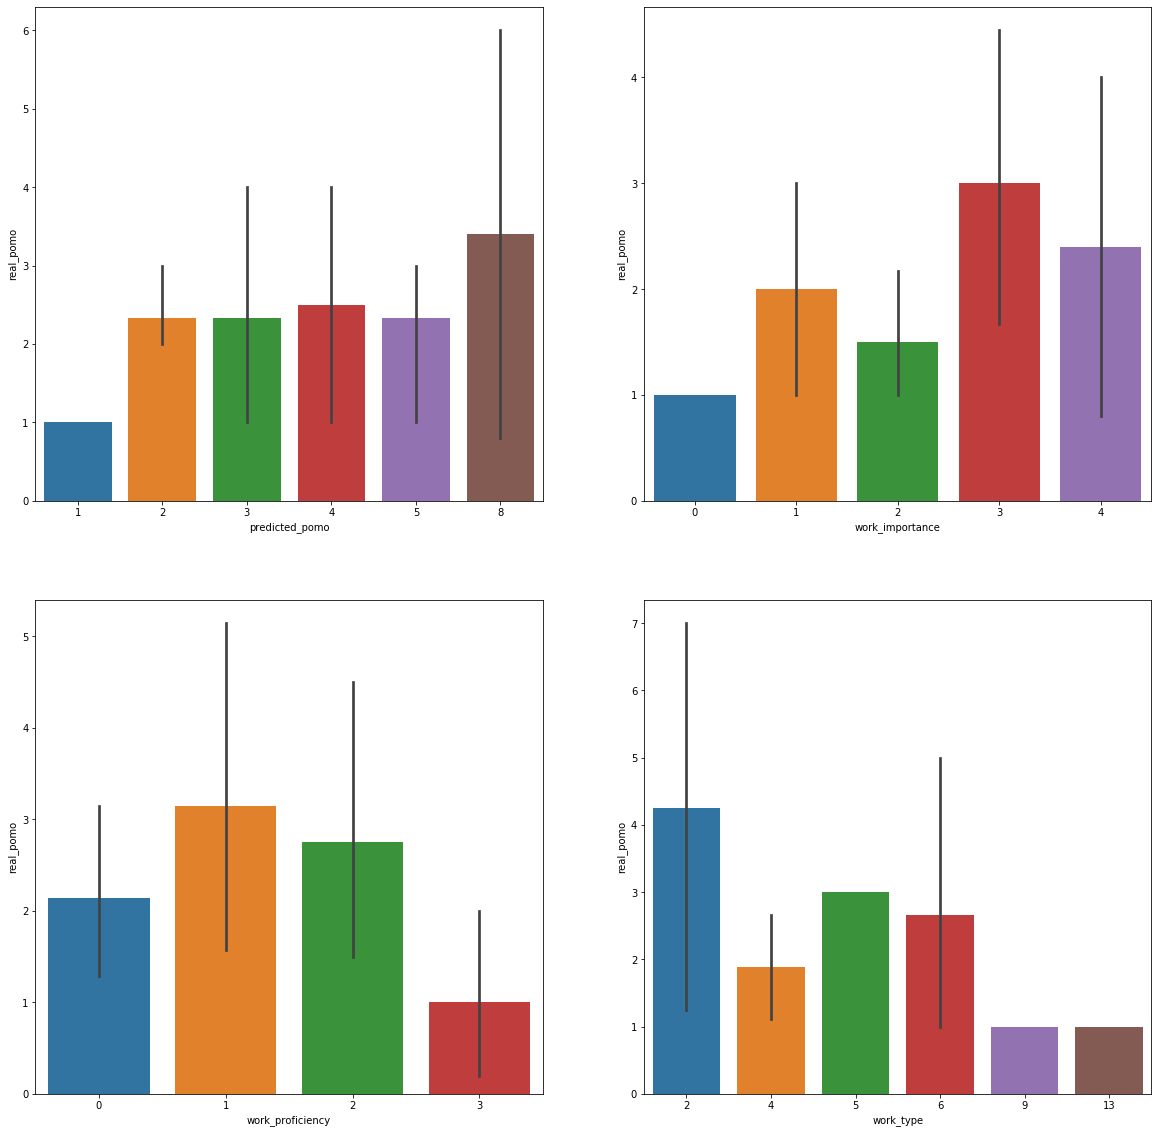

In [24]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(20, 20)

sns.barplot(data=todo_df, x='predicted_pomo', y='real_pomo', ax=ax1)
sns.barplot(data=todo_df, x='work_importance', y='real_pomo', ax=ax2)
sns.barplot(data=todo_df, x='work_proficiency', y='real_pomo', ax=ax3)
sns.barplot(data=todo_df, x='work_type', y='real_pomo', ax=ax4)

## 결측치 확인
- 삭제
- 평균, 중앙값, 최빈값 등으로 채우기

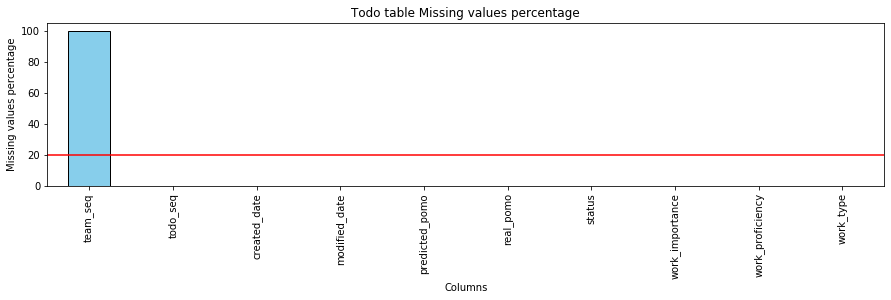

In [26]:
# 결측치 비율

plt.figure(figsize=(15, 3))
percentage = (todo_df.isnull().mean())*100
percentage.sort_values(ascending=False).plot.bar(color='skyblue', edgecolor='black')
plt.axhline(y=20, color='r', linestyle='-')
plt.title('Todo table Missing values percentage')
plt.xlabel('Columns')
plt.ylabel('Missing values percentage')

plt.show()